In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_max = pd.read_csv('../logs/36-1-retry.tsv', sep='\t')
df_min = pd.read_csv('../logs/36-1-r-retry.tsv', sep='\t')

In [3]:
min_score = min(df_min.min(axis=0))

In [4]:
d = pd.DataFrame(columns=['gen_idx', 'score', 'objective'])

In [5]:
df = df_max
objective = 'maximize'
for gen_idx in range(0, len(df)):
    for s in df.loc[gen_idx]:
        d = d.append({
            'gen_idx':str(gen_idx), 
            'score': (s-min_score)/min_score*100, 
            'objective':objective
        }, 
            ignore_index=True
        )
        

In [6]:
df = df_min
objective = 'minimize'
for gen_idx in range(0, len(df)):
    for s in df.loc[gen_idx]:
        d = d.append({
            'gen_idx':str(gen_idx), 
            'score':(s-min_score)/min_score*100, 
            'objective':objective
        }, ignore_index=True)

In [7]:
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


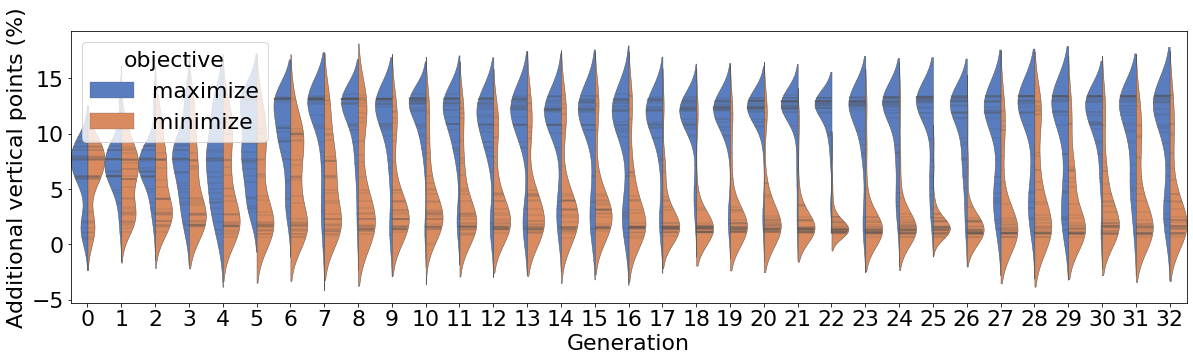

In [8]:
plt.rc('figure', figsize=(20, 5))

fig, ax = plt.subplots(1, 1, 
                         #sharey=True,
                         #sharex = 'col'
                         #constrained_layout=True
                        )
ax = sns.violinplot(x='gen_idx', y='score', hue='objective',
                    data=d, palette='muted', split=True,
                   width=1, inner='stick', linewidth=.5, scale='width', scale_hue=True)

#ax.set_title('Optimization result')
ax.set_xlabel('Generation')
ax.set_ylabel('Additional vertical points (%)')

plt.savefig('b.svg')

The evolution progressed towards the directions we set.
* up to gen #22: homogeneous
* after #22: more diverse